<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


'wget' is not recognized as an internal or external command,
operable program or batch file.


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


C:\Users\rahim\AppData\Local\Temp\ipykernel_5628\3139121146.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['JobSatNumeric'] = df_clean['JobSat']


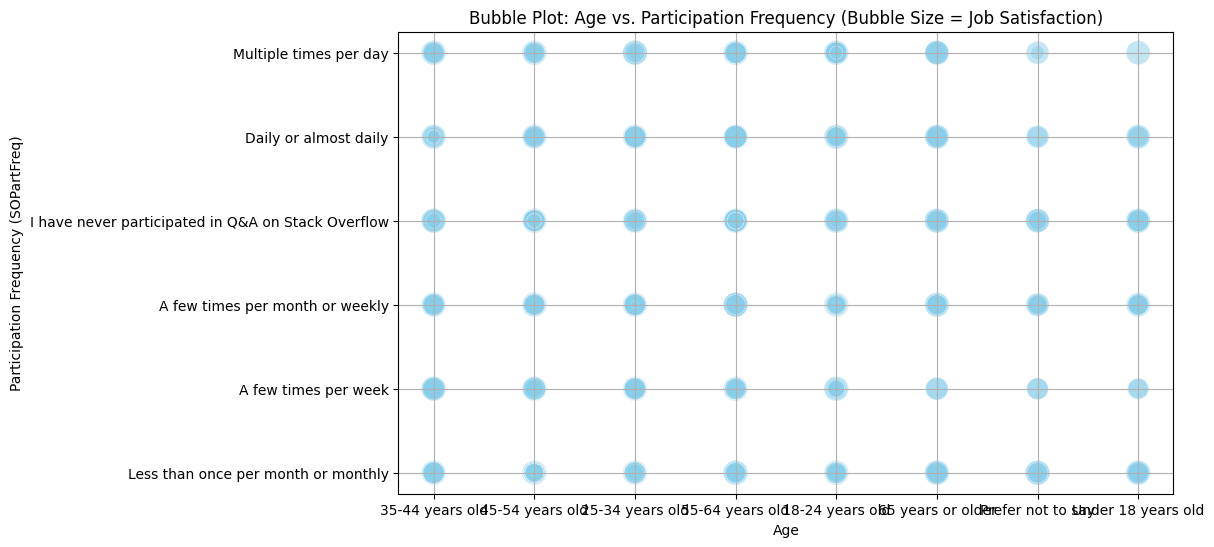

In [3]:
##Write your code here
# Drop rows with missing values in the required columns
df_clean = df.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

# Convert JobSat to numeric if it's not already (for bubble size)
# This assumes JobSat is ordinal like 'Very dissatisfied' to 'Very satisfied'
# Create a mapping if necessary
if df_clean['JobSat'].dtype == 'object':
    satisfaction_mapping = {
        'Very dissatisfied': 1,
        'Dissatisfied': 2,
        'Neutral': 3,
        'Satisfied': 4,
        'Very satisfied': 5
    }
    df_clean['JobSatNumeric'] = df_clean['JobSat'].map(satisfaction_mapping)
else:
    df_clean['JobSatNumeric'] = df_clean['JobSat']

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_clean['Age'],
    df_clean['SOPartFreq'],
    s=df_clean['JobSatNumeric'] * 30,  # Adjust size multiplier as needed
    alpha=0.5,
    c='skyblue',
    edgecolors='w',
    linewidth=0.5
)
plt.xlabel("Age")
plt.ylabel("Participation Frequency (SOPartFreq)")
plt.title("Bubble Plot: Age vs. Participation Frequency (Bubble Size = Job Satisfaction)")
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


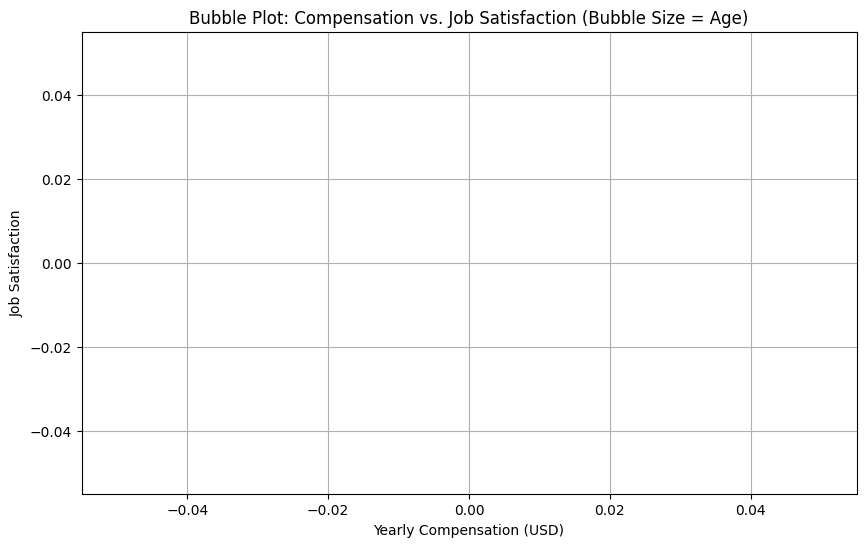

In [5]:
# Ensure 'Age' is numeric and drop any rows with missing/invalid values
df_clean2 = df[['ConvertedCompYearly', 'JobSat', 'Age']].copy()
df_clean2 = df_clean2.dropna()

# Convert 'Age' to numeric in case of invalid entries
df_clean2['Age'] = pd.to_numeric(df_clean2['Age'], errors='coerce')

# Convert JobSat to numeric if needed
if df_clean2['JobSat'].dtype == 'object':
    satisfaction_mapping = {
        'Very dissatisfied': 1,
        'Dissatisfied': 2,
        'Neutral': 3,
        'Satisfied': 4,
        'Very satisfied': 5
    }
    df_clean2['JobSatNumeric'] = df_clean2['JobSat'].map(satisfaction_mapping)
else:
    df_clean2['JobSatNumeric'] = df_clean2['JobSat']

# Final clean-up: drop any rows with NaNs left
df_clean2 = df_clean2.dropna(subset=['ConvertedCompYearly', 'JobSatNumeric', 'Age'])

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_clean2['ConvertedCompYearly'],
    df_clean2['JobSatNumeric'],
    s=df_clean2['Age'].astype(float) * 2,  # Ensuring float type
    alpha=0.5,
    c='lightcoral',
    edgecolors='black',
    linewidth=0.5
)
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction")
plt.title("Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)")
plt.grid(True)
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



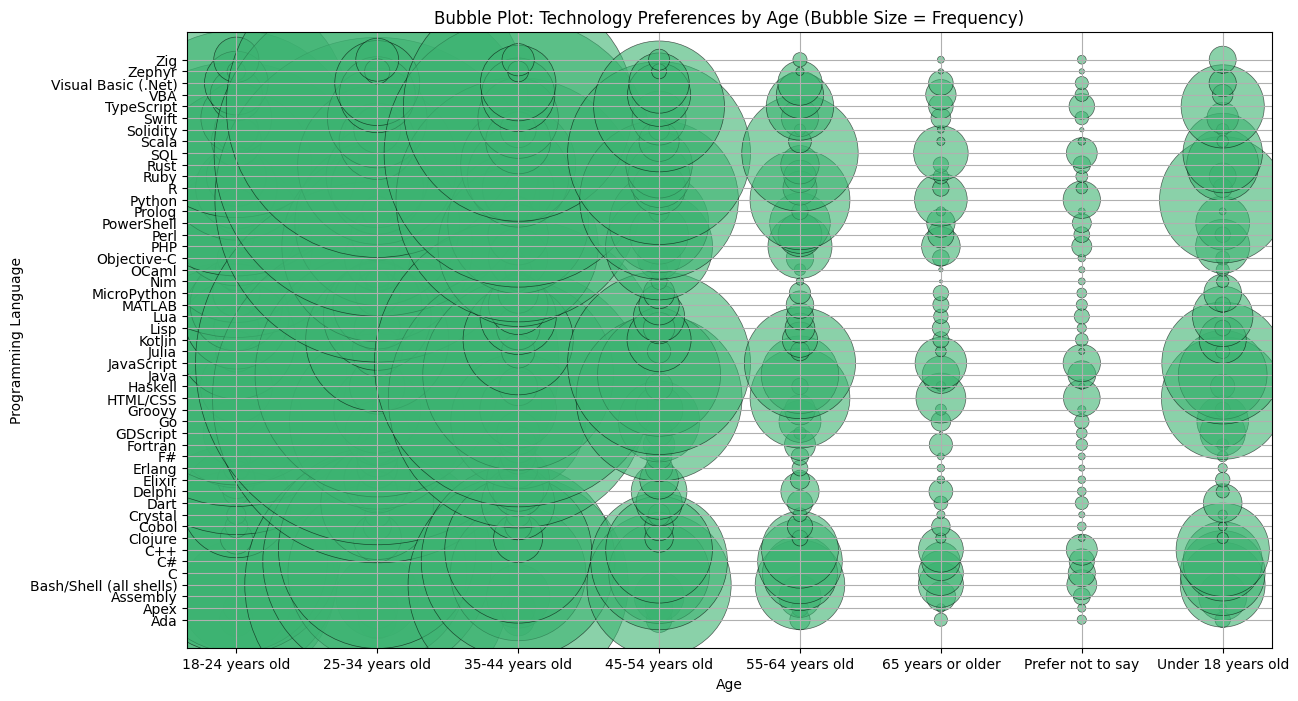

In [6]:
##Write your code here
# Drop rows with missing values in 'LanguageHaveWorkedWith' or 'Age'
df_lang = df[['Age', 'LanguageHaveWorkedWith']].dropna()

# Split the languages into individual rows
df_lang_expanded = df_lang.assign(Language=df_lang['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Group by Age and Language, count occurrences
language_counts = df_lang_expanded.groupby(['Age', 'Language']).size().reset_index(name='Frequency')

# Plot bubble plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    language_counts['Age'],
    language_counts['Language'],
    s=language_counts['Frequency'] * 5,  # Size based on frequency
    alpha=0.6,
    c='mediumseagreen',
    edgecolors='black',
    linewidth=0.5
)

plt.xlabel("Age")
plt.ylabel("Programming Language")
plt.title("Bubble Plot: Technology Preferences by Age (Bubble Size = Frequency)")
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


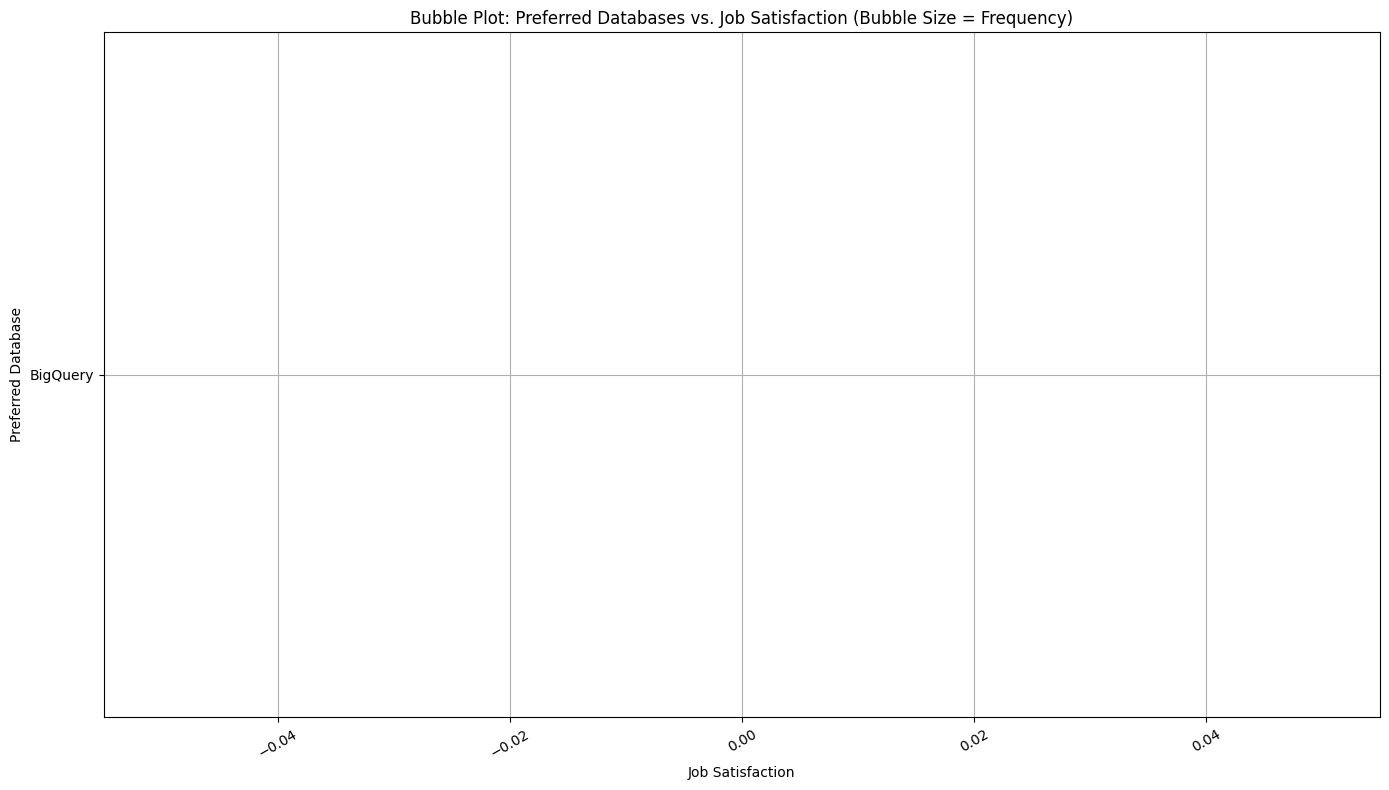

In [7]:
##Write your code here
# Drop rows with missing values
df_db = df[['JobSat', 'DatabaseWantToWorkWith']].dropna()

# Split multiple databases into separate rows
df_db_expanded = df_db.assign(Database=df_db['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Group by JobSat and Database, and count the number of respondents
db_counts = df_db_expanded.groupby(['JobSat', 'Database']).size().reset_index(name='Frequency')

# Optional: sort JobSat if it's ordinal and text-based
job_sat_order = [
    'Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied'
]
db_counts['JobSat'] = pd.Categorical(db_counts['JobSat'], categories=job_sat_order, ordered=True)

# Sort values to ensure correct plotting order
db_counts = db_counts.sort_values(['JobSat', 'Database'])

# Plot the bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    db_counts['JobSat'],
    db_counts['Database'],
    s=db_counts['Frequency'] * 5,  # Adjust size as needed
    alpha=0.6,
    c='cornflowerblue',
    edgecolors='black',
    linewidth=0.5
)

plt.xlabel("Job Satisfaction")
plt.ylabel("Preferred Database")
plt.title("Bubble Plot: Preferred Databases vs. Job Satisfaction (Bubble Size = Frequency)")
plt.grid(True)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


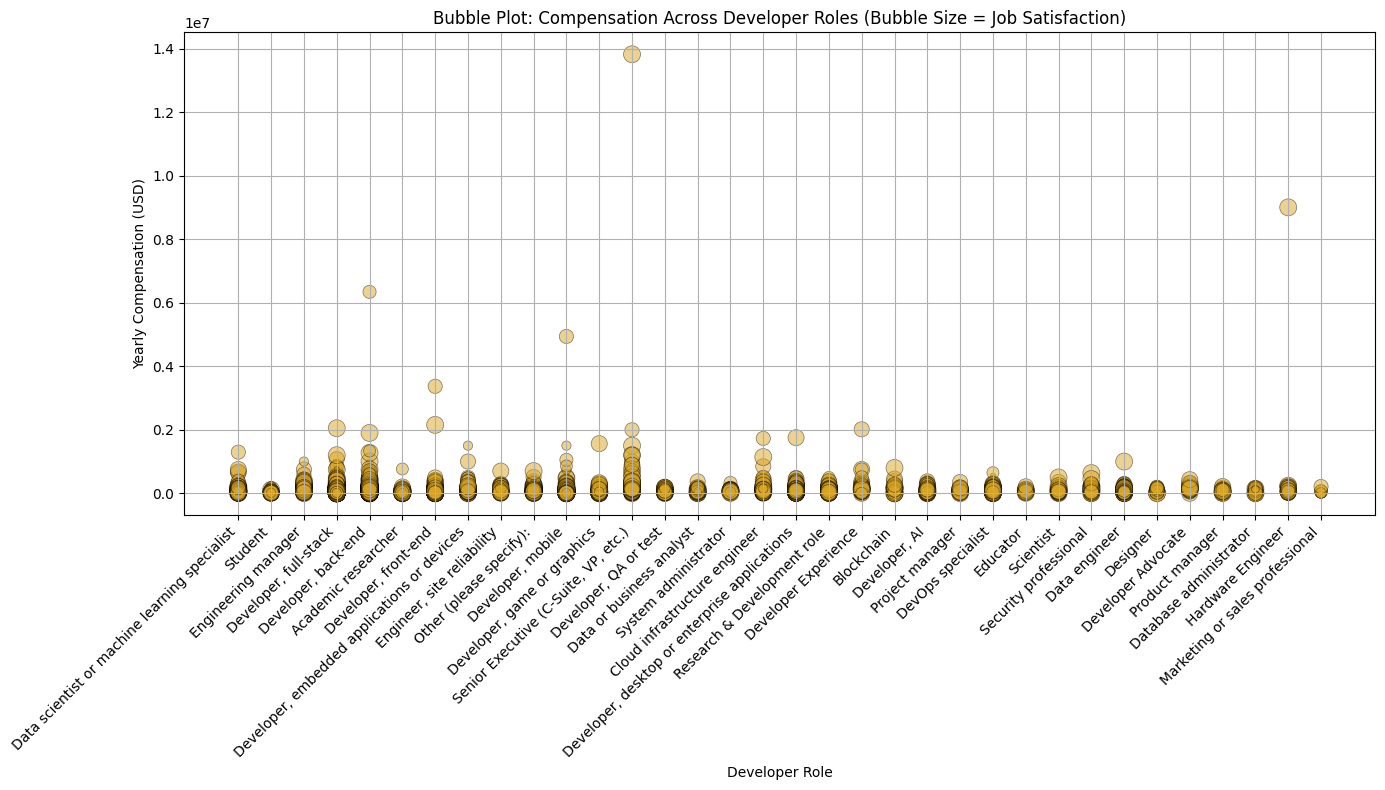

In [8]:
##Write your code here
# Drop rows with missing required columns
df_roles = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna()

# Split multiple roles into separate rows
df_roles_expanded = df_roles.assign(Role=df_roles['DevType'].str.split(';')).explode('Role')

# Map JobSat to numeric values for bubble size (if needed)
if df_roles_expanded['JobSat'].dtype == 'object':
    satisfaction_mapping = {
        'Very dissatisfied': 1,
        'Dissatisfied': 2,
        'Neutral': 3,
        'Satisfied': 4,
        'Very satisfied': 5
    }
    df_roles_expanded['JobSatNumeric'] = df_roles_expanded['JobSat'].map(satisfaction_mapping)
else:
    df_roles_expanded['JobSatNumeric'] = df_roles_expanded['JobSat']

# Drop any NaNs from mapping
df_roles_expanded = df_roles_expanded.dropna(subset=['ConvertedCompYearly', 'Role', 'JobSatNumeric'])

# Plot the bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    df_roles_expanded['Role'],
    df_roles_expanded['ConvertedCompYearly'],
    s=df_roles_expanded['JobSatNumeric'] * 15,  # Size by Job Satisfaction
    alpha=0.5,
    c='goldenrod',
    edgecolors='black',
    linewidth=0.5
)

plt.xlabel("Developer Role")
plt.ylabel("Yearly Compensation (USD)")
plt.title("Bubble Plot: Compensation Across Developer Roles (Bubble Size = Job Satisfaction)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


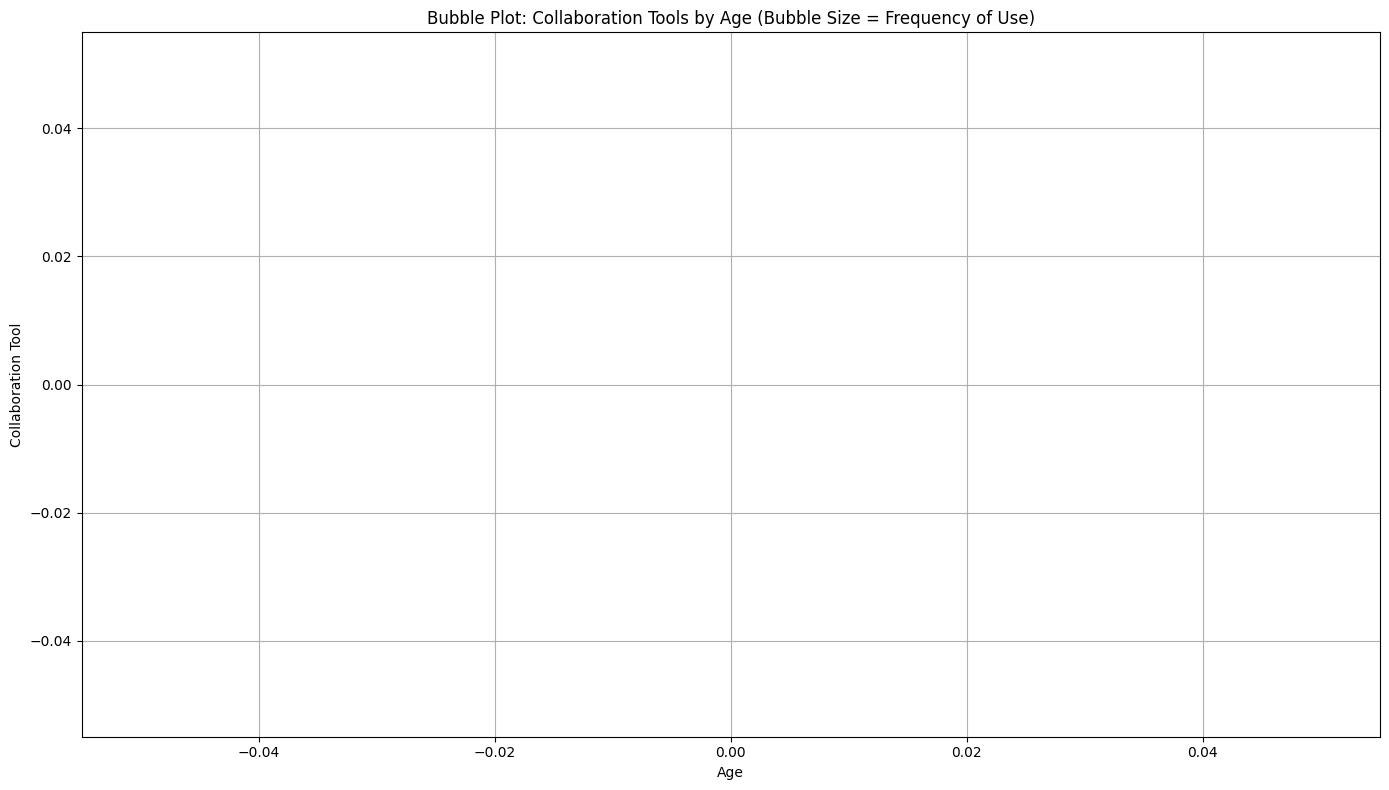

In [12]:
# Drop rows with missing values
df_tools = df[['Age', 'NEWCollabToolsHaveWorkedWith']].dropna()

# Split multiple tools into separate rows
df_tools_expanded = df_tools.assign(Tool=df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')

# Group by Age and Tool, count frequency
tool_counts = df_tools_expanded.groupby(['Age', 'Tool']).size().reset_index(name='Frequency')

# Optional: convert Age to numeric (if needed)
tool_counts['Age'] = pd.to_numeric(tool_counts['Age'], errors='coerce')
tool_counts = tool_counts.dropna(subset=['Age'])

# Plot the bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    tool_counts['Age'],
    tool_counts['Tool'],
    s=tool_counts['Frequency'] * 5,  # Adjust size multiplier
    alpha=0.6,
    c='mediumorchid',
    edgecolors='black',
    linewidth=0.5
)

plt.xlabel("Age")
plt.ylabel("Collaboration Tool")
plt.title("Bubble Plot: Collaboration Tools by Age (Bubble Size = Frequency of Use)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



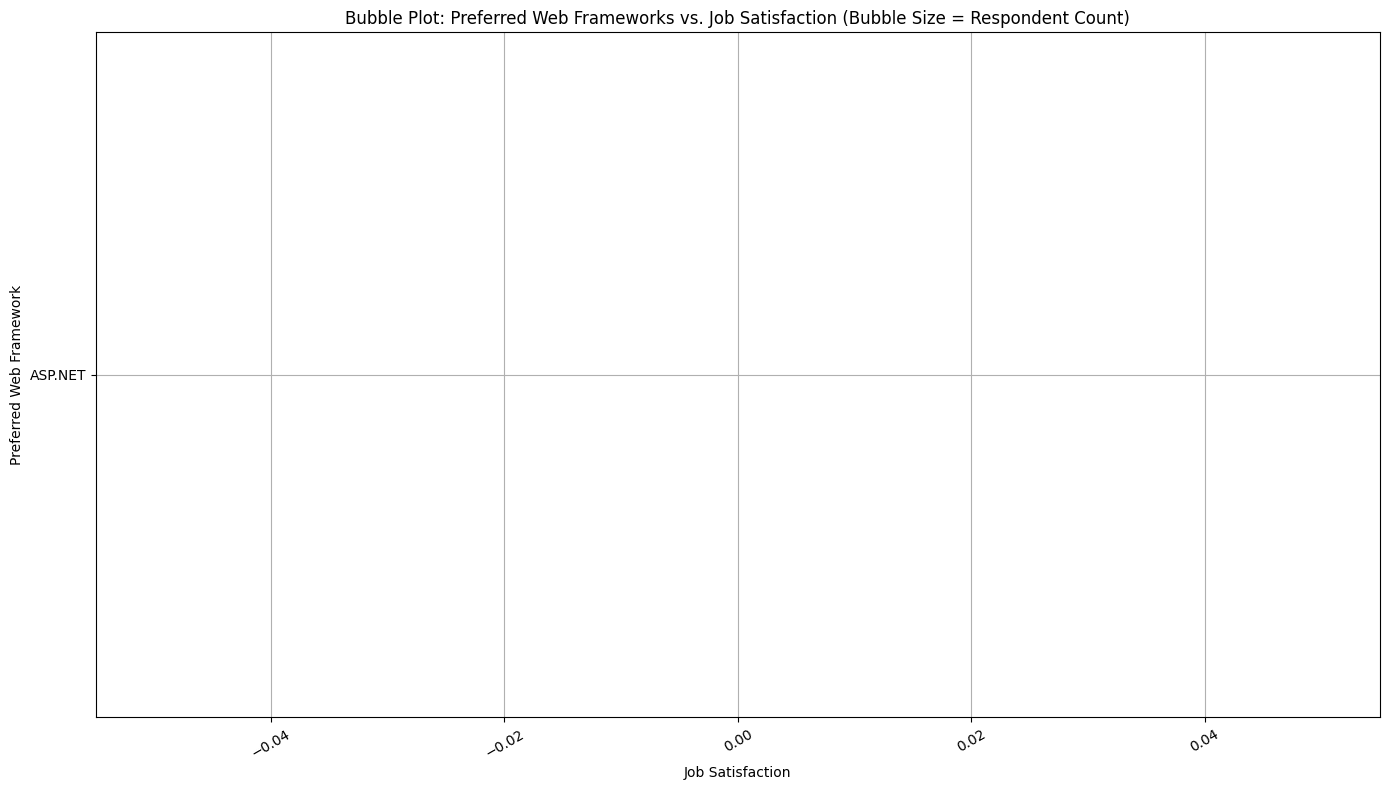

In [13]:
##Write your code here
# Drop rows with missing values
df_web = df[['JobSat', 'WebframeWantToWorkWith']].dropna()

# Split multiple frameworks into separate rows
df_web_expanded = df_web.assign(Framework=df_web['WebframeWantToWorkWith'].str.split(';')).explode('Framework')

# Group by Job Satisfaction and Framework, count frequency
web_counts = df_web_expanded.groupby(['JobSat', 'Framework']).size().reset_index(name='Frequency')

# Optional: sort JobSat if it’s ordinal text
job_sat_order = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
web_counts['JobSat'] = pd.Categorical(web_counts['JobSat'], categories=job_sat_order, ordered=True)

# Sort for cleaner plotting
web_counts = web_counts.sort_values(['JobSat', 'Framework'])

# Plot
plt.figure(figsize=(14, 8))
plt.scatter(
    web_counts['JobSat'],
    web_counts['Framework'],
    s=web_counts['Frequency'] * 5,  # Adjust size as needed
    alpha=0.6,
    c='steelblue',
    edgecolors='black',
    linewidth=0.5
)

plt.xlabel("Job Satisfaction")
plt.ylabel("Preferred Web Framework")
plt.title("Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction (Bubble Size = Respondent Count)")
plt.grid(True)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



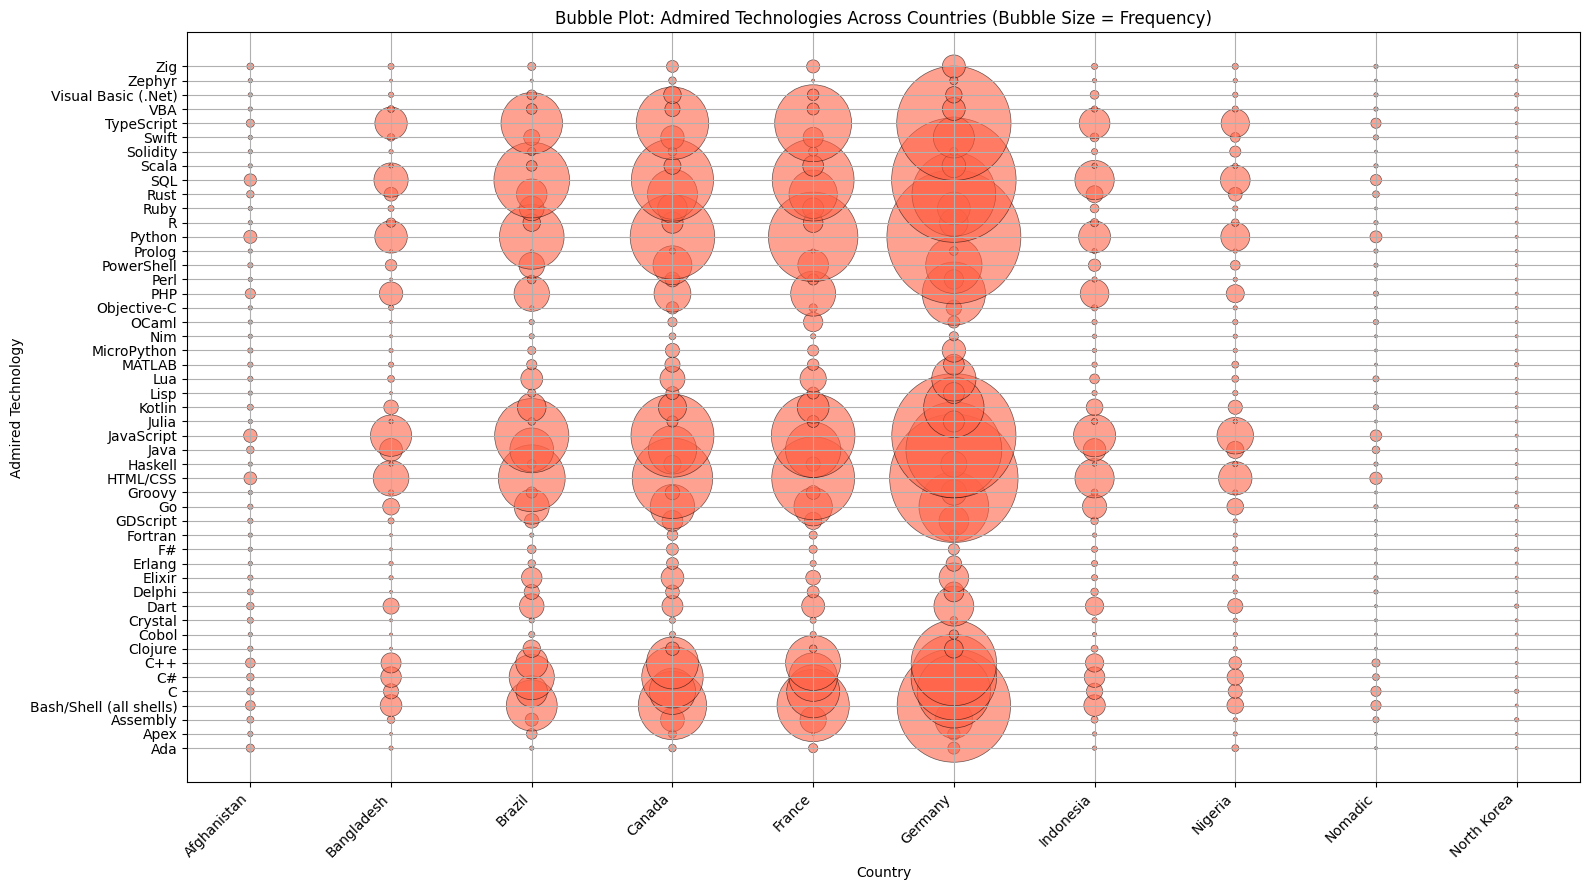

In [14]:
##Write your code here
# Drop missing values
df_admire = df[['Country', 'LanguageAdmired']].dropna()

# Split multiple admired languages into separate rows
df_admire_expanded = df_admire.assign(Language=df_admire['LanguageAdmired'].str.split(';')).explode('Language')

# Group by Country and Language, count frequency
admire_counts = df_admire_expanded.groupby(['Country', 'Language']).size().reset_index(name='Frequency')

# Optional: Filter to top countries or top admired languages to simplify the plot
top_countries = admire_counts['Country'].value_counts().head(10).index
admire_counts = admire_counts[admire_counts['Country'].isin(top_countries)]

# Plot
plt.figure(figsize=(16, 9))
plt.scatter(
    admire_counts['Country'],
    admire_counts['Language'],
    s=admire_counts['Frequency'] * 5,
    alpha=0.6,
    c='tomato',
    edgecolors='black',
    linewidth=0.5
)

plt.xlabel("Country")
plt.ylabel("Admired Technology")
plt.title("Bubble Plot: Admired Technologies Across Countries (Bubble Size = Frequency)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
